In [12]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, RobustScaler
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from matplotlib.ticker import MaxNLocator
plt.style.use('fivethirtyeight')

In [2]:
data = pd.read_csv('bank-additional-full.csv', sep = ';')
data = data.drop('duration', axis = 1)
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
target = data.iloc[:,-1:]
le = LabelEncoder()
target = target.apply(le.fit_transform)
target.head()

,y
0,0
1,0
2,0
3,0
4,0


In [4]:
count = target['y'].value_counts()
print(count)

0    36548
1     4640
Name: y, dtype: int64


Classifier should score above 88.7%

In [5]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
y                 41188 non-null object
dtypes: float64(5), int64(4), object(11)
memory usage: 6.3+ MB


In [7]:
data_float = data.select_dtypes(include = ['float64'])
data_float.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191.0
1,1.1,93.994,-36.4,4.857,5191.0
2,1.1,93.994,-36.4,4.857,5191.0
3,1.1,93.994,-36.4,4.857,5191.0
4,1.1,93.994,-36.4,4.857,5191.0


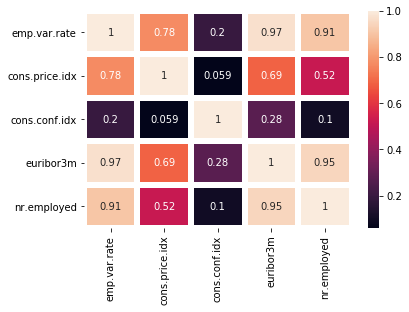

In [8]:
data_float_corr = data_float.corr()
sns.heatmap(data_float_corr, annot = True, linewidths = 5)

In [10]:
comparison_data = pd.concat([data_float, target], axis = 1)
comparison_data.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.1,93.994,-36.4,4.857,5191.0,0
1,1.1,93.994,-36.4,4.857,5191.0,0
2,1.1,93.994,-36.4,4.857,5191.0,0
3,1.1,93.994,-36.4,4.857,5191.0,0
4,1.1,93.994,-36.4,4.857,5191.0,0


In [13]:
from matplotlib.ticker import MaxNLocator
plt.style.use('fivethirtyeight')

In [ ]:
#The size 
_= plt.figure(num=None,figsize=(24,15),dpi=100,facecolor='w',edgecolor='k')

sns.swarmplot(comparison_data['cons.price.idx'],comparison_data['y'],size=5)
plt.title('Deaths Per Bombing per Country(2002-2017)\n 1 dot = 1 strike',fontsize=32)
plt.xlabel('Country',fontsize=30)
plt.ylabel('Deaths',fontsize=30)

#Signature Bar
plt.text(x=-0.5,y=-17,
    s = '   @Nasdin, Nasrudin Salim                    Source: api.dronestre.am   ',
    fontsize = 15, color = '#f0f0f0', backgroundcolor = 'grey')
#save the plot
plt.savefig('deathsperbombingpercountry.png')
plt.show()

 There seems to be no connection between the economic indicators and the purcahsing decision made by the customer.

In [ ]:
clf = ExtraTreesClassifier()
clf = clf.fit(data_float, target)
model_float = SelectFromModel(clf, prefit=True)
data_float = model_float.transform(data_float)
data_float.shape     

In [10]:
data_int = data.select_dtypes(include = ['int64'])
data_int.head()

,age,campaign,pdays,previous
0,56,1,999,0
1,57,1,999,0
2,37,1,999,0
3,40,1,999,0
4,56,1,999,0


In [11]:
data_int = data_int.replace(to_replace = 999, value = 0)
data_int.head()

,age,campaign,pdays,previous
0,56,1,0,0
1,57,1,0,0
2,37,1,0,0
3,40,1,0,0
4,56,1,0,0


In [12]:
comparison_data_2 = pd.concat([data_int, target], axis = 1)
comparison_data_2.head()

,age,campaign,pdays,previous,y
0,56,1,0,0,0
1,57,1,0,0,0
2,37,1,0,0,0
3,40,1,0,0,0
4,56,1,0,0,0


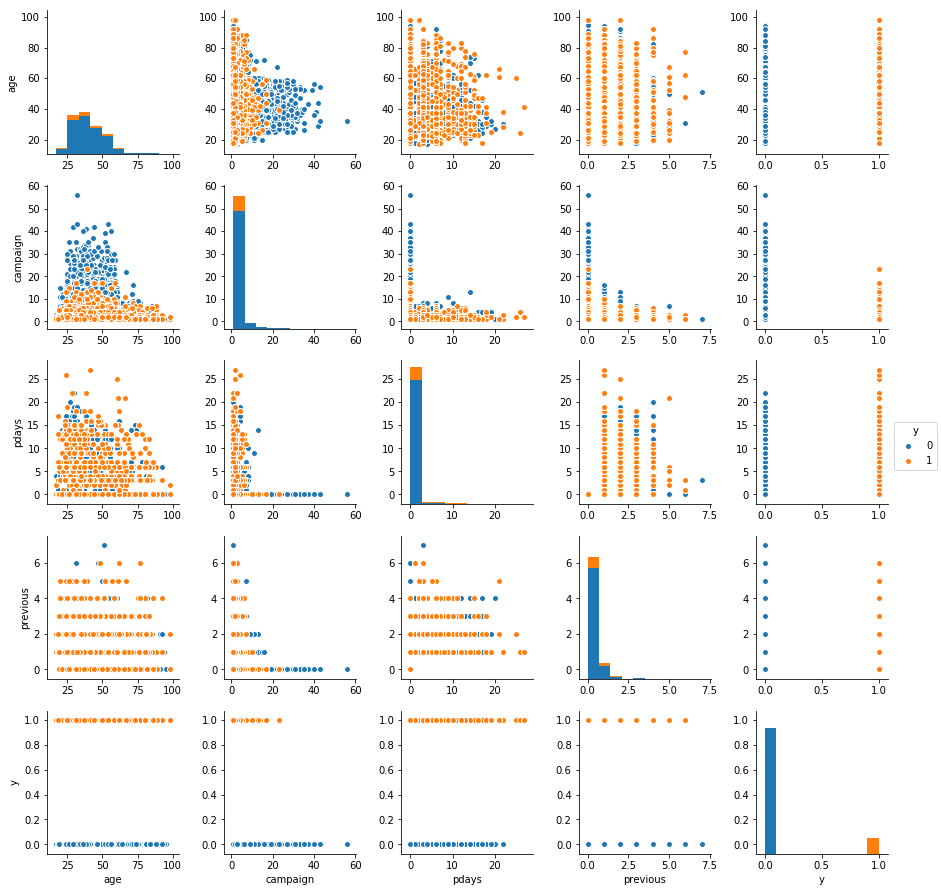

In [13]:
sns.pairplot(comparison_data_2, hue = 'y')

Campaign vs decision. It seems that the duration of campaign is a sure sign of purchasing decision. More than 25 contact been made in the campaign,customer usually won't be buying the policy.

In [14]:
data_object = data.select_dtypes(include = ['object'])
data_object = data_object.drop(['y'], axis =1)
data_object.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [15]:
data_object['default'].replace(to_replace = 'unknown', value = 'no', inplace = True)
data_object['marital'].replace(to_replace = 'unknown', value = 'married', inplace = True)
data_object['education'].replace(to_replace = 'unknown', value = 'university.degree', inplace = True)
data_object['job'].replace(to_replace = 'unknown', value = 'admin.', inplace = True)
data_object['housing'].replace(to_replace = 'unknown', value = 'yes', inplace = True)
data_object['loan'].replace(to_replace = 'unknown', value = 'no', inplace = True)
data_object['loan'].replace(to_replace = 'unknown', value = 'no', inplace = True)
data_object.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent
1,services,married,high.school,no,no,no,telephone,may,mon,nonexistent
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent


In [16]:
le = LabelEncoder()
data_object = data_object.apply(le.fit_transform)
enc = OneHotEncoder(sparse = False)
data_object = enc.fit_transform(data_object)
data_object.shape

(41188, 47)

In [30]:
sc = RobustScaler()
data_int = sc.fit_transform(data_int)

sc_2 = RobustScaler()
data_float = sc_2.fit_transform(data_float)

sc_3 = RobustScaler()
data_object = sc_3.fit_transform(data_object)

In [31]:
feature = np.hstack([data_float,data_int, data_object])

In [32]:
X_train, X_test, y_train, y_test = train_test_split(feature, target, stratify = target, test_size = 0.15)

In [41]:
from sklearn.ensemble import GradientBoostingClassifier
rf_clf = GradientBoostingClassifier(n_estimators = 600, max_depth = 8, min_samples_split = 4)
rf_clf.fit(X_train, y_train)

C:\Users\Parmenides\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=8,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=4,
              min_weight_fraction_leaf=0.0, n_estimators=600,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [42]:
y_pred = rf_clf.predict(X_test)

In [43]:
# Part 4 Evaluation

from sklearn.metrics import confusion_matrix, recall_score, precision_score,f1_score,accuracy_score
cm = confusion_matrix(y_test, y_pred)
ps = precision_score(y_test, y_pred)
rs = recall_score(y_test, y_pred)
f1 = f1_score(y_test,y_pred)
accuracy = accuracy_score(y_test,y_pred)
print(cm)
print(ps)
print(rs)
print(f1)
print(accuracy)

[[5277  206]
 [ 487  209]]
0.503614457831
0.300287356322
0.376237623762
0.887845929762


In [40]:
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth': [4,6],
              'min_samples_split': [2,4]}
Grid_search= GridSearchCV( estimator = rf_clf, param_grid = parameters,scoring = 'accuracy', cv = 3,verbose = 2, n_jobs = -1)
Grid_search = Grid_search.fit(X_train, y_train)
best_parameters = Grid_search.best_params_
best_accuracy = Grid_search.best_score_

Fitting 3 folds for each of 4 candidates, totalling 12 fits


KeyboardInterrupt: 